In [1]:
import sys
sys.path.append('..')  # 添加上级目录到搜索路径
from utils import *

In [2]:
filename = ["Blogs", "Metabolic", "Drosophila", "Music", "Airports", "Proteome",\
            "USpowergrid", "Gnutella", "Words", "DBLP", "Internet", "Enron"]

beta_range = np.logspace(-3, 3, 200)
kmin = [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

In [3]:
net_label = 1

print(filename[net_label])
G = load_graph_data(filename[net_label])
N, M = nx.number_of_nodes(G), nx.number_of_edges(G)
avk0 = 2*M/N
print(avk0)

# 设定移除节点比例
if N < 10000:
    l = 4
elif N >= 10000 and N < 20000:
    l = 5
else:
    l = 6
q = [1- 1./2**i for i in range(l)]
print(q)


DC_plus = cal_DC_plus(G)
sequence_DC_plus = dict(sorted(DC_plus.items(), key=lambda x: x[1], reverse=False))

Metabolic
6.571030640668524
[0.0, 0.5, 0.75, 0.875]


In [4]:
# 未剪枝的结果
nom_Z_tau = cal_Z_tau_real(G, sequence_DC_plus, N, q, beta_range)

# 剪枝的结果
nom_Z_tau_prune = cal_Z_tau_real(G, sequence_DC_plus, N, q[1:], beta_range, kmin=kmin[net_label], prune_flag=True)

True
1436
1---: 6.571030640668524
True
718
1---: 8.384401114206128
True
359
1---: 9.710306406685238
True
180
1---: 10.077777777777778
True
718
1---: 8.384401114206128
718
2---: 6.579387186629527
True
359
1---: 9.710306406685238
359
2---: 6.579387186629527
True
180
1---: 10.077777777777778
180
2---: 6.5777777777777775


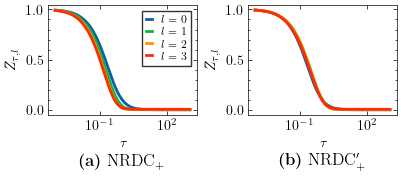

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(4, 1.75), constrained_layout=True)
ax = axs[0]
ax.plot(beta_range, nom_Z_tau[0], linewidth = 2.0, clip_on=False, label="$l =$ "+str(0))
ax.plot(beta_range, nom_Z_tau[1], linewidth = 2.0, clip_on=False, label="$l =$ "+str(1))
ax.plot(beta_range, nom_Z_tau[2], linewidth = 2.0, clip_on=False, label="$l =$ "+str(2))
ax.plot(beta_range, nom_Z_tau[3], linewidth = 2.0, clip_on=False, label="$l =$ "+str(3))
if l > 4:
    ax.plot(beta_range, nom_Z_tau[4], linewidth = 2.0, clip_on=False, label="$l=$ "+str(4))            
if l > 5:
    ax.plot(beta_range, nom_Z_tau[5], linewidth = 2.0, clip_on=False, label="$l=$ "+str(5))  
ax.legend(loc=1, edgecolor = "black", fontsize=8, labelspacing=0.2, handlelength=0.5, frameon=True, fancybox=False) 
ax.set_ylabel(r"$\bar Z_{\tau,l}$")
ax.set_xlabel(r"$\tau$")
ax.set_xscale("log")
ax.set_title(r"\textbf{(a)} NRDC$_{+}$", loc='center', y=-0.55, fontsize=12)


ax = axs[1]
ax.plot(beta_range, nom_Z_tau[0], linewidth = 2.0, clip_on=False, label="$l =$ "+str(0))
ax.plot(beta_range, nom_Z_tau_prune[0], linewidth = 2.0, clip_on=False, label="$l =$ "+str(1))
ax.plot(beta_range, nom_Z_tau_prune[1], linewidth = 2.0, clip_on=False, label="$l =$ "+str(2))
ax.plot(beta_range, nom_Z_tau_prune[2], linewidth = 2.0, clip_on=False, label="$l =$ "+str(3))
if l > 4:
    ax.plot(beta_range, nom_Z_tau_prune[3], linewidth = 2.0, clip_on=False, label="$l=$ "+str(4))            
if l > 5:
    ax.plot(beta_range, nom_Z_tau_prune[4], linewidth = 2.0, clip_on=False, label="$l=$ "+str(5))  

ax.set_ylabel(r"$\bar Z_{\tau,l}$")
ax.set_xlabel(r"$\tau$")
ax.set_xscale("log")
ax.set_title(r"\textbf{(b)} NRDC$_{+}^{\prime}$", loc='center', y=-0.55, fontsize=12)

plt.savefig(filename[net_label] + "_nom_partition_function_DC_plus.pdf")
plt.show()